Use this dataset of airline arrival information to predict how late flights
will be. A flight only counts as late if it is more than 30 minutes late.
1. The project should follow guideline as previous projects.
2. Apply models in Naïve Bayes, Logistic Regression, Decision
Tree, Random Forest, Gradient Boosting and SVM.
3. Apply PCA, SelectKBest and RFE for feature selections.
4. Using gridsearchCV to obtain best parameters for models.
5. Compare performances among models, write up analysis
why the model is good or bad in the algorithmic approach
(explain why the algorithm is good or bad for the dataset
structure, can you do something to improve the model?)
6. Include the conclusions.

# Abstract
In this report, models are contructed to predict flight delays using Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM. There are two sections for the model prediction, one using all possible features and one use PCA for features selection. At the end of this report, one will have the basic concept of predicting the delay of flight base on the performance comparison between different models. This report is structured as:
1. Initial Data Exploration with Data cleaning
2. Data Visualization
3. Prediction models contruction and Comparision
4. Conclusion


## 1. Initial Data Exploration with Data cleaning

In [2]:
%config IPCompleter.greedy=True

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('D:\\ML_coures\\CBD_assigment\\Assignment_05_Flight_arrival\\2008.csv\\2008.csv')
## load data
#pd.set_option('display.max_columns', None)
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [4]:
#Variable descriptions
#Name	Description
#1	Year	1987-2008
#2	Month	1-12
#3	DayofMonth	1-31
#4	DayOfWeek	1 (Monday) - 7 (Sunday)
#5	DepTime	actual departure time (local, hhmm)
#6	CRSDepTime	scheduled departure time (local, hhmm)
#7	ArrTime	actual arrival time (local, hhmm)
#8	CRSArrTime	scheduled arrival time (local, hhmm)
#9	UniqueCarrier	unique carrier code
#10	FlightNum	flight number
#11	TailNum	plane tail number
#12	ActualElapsedTime	in minutes
#13	CRSElapsedTime	in minutes
#14	AirTime	in minutes
#15	ArrDelay	arrival delay, in minutes
#16	DepDelay	departure delay, in minutes
#17	Origin	origin IATA airport code
#18	Dest	destination IATA airport code
#19	Distance	in miles
#20	TaxiIn	taxi in time, in minutes
#21	TaxiOut	taxi out time in minutes
#22	Cancelled	was the flight cancelled?
#23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
#24	Diverted	1 = yes, 0 = no
#25	CarrierDelay	in minutes
#26	WeatherDelay	in minutes
#27	NASDelay	in minutes
#28	SecurityDelay	in minutes
#29	LateAircraftDelay	in minutes

To have an overview of the missing data status in the data, an information table is created as followed:

In [5]:

print('Dataframe dimensions:', data.shape) ## print shape
pd.set_option('display.max_columns', None)
#____________________________________________________________
# gives some infor on columns types and number of null values
tab_info=pd.DataFrame(data.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(data.isnull().sum()/data.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info



Dataframe dimensions: (7009728, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
column type,int64,int64,int64,int64,float64,int64,float64,int64,object,int64,object,float64,float64,float64,float64,float64,object,object,int64,float64,float64,int64,object,int64,float64,float64,float64,float64,float64
null values,0,0,0,0,136246,0,151649,0,0,0,83365,154699,844,154699,154699,136246,0,0,0,151649,137058,0,6872294,0,5484993,5484993,5484993,5484993,5484993
null values (%),0,0,0,0,1.94367,0,2.16341,0,0,0,1.18928,2.20692,0.0120404,2.20692,2.20692,1.94367,0,0,0,2.16341,1.95525,0,98.0394,0,78.2483,78.2483,78.2483,78.2483,78.2483


In [6]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


As illustrated in the table, the missing data percentage is very high, upto 98 % for **CancellationCode**.  Some other columns include 78.2% in **CarrierDelay, NASDelay, Security Delay, Weather Delay, LateAircraftDelay** etc. Let's explore the relationship between the **CancellationCode** and **Cancelled**:

In [7]:
print (data.Cancelled[data.Cancelled>0].count())
print (data.shape[0] - data.CancellationCode.isnull().sum())

137434
137434


These two number are exactly the same, which means cancellation code is available only for cancelled flights.

To deal with the missing data, all of columns which ocupied more than 60 % of missing will be dropped. Furthermore, all of nan values will be dropped to create a new data set as followed:

In [8]:
## drop null keep cancel code and delay reasons
null_col=data.columns[data.isna().any()].tolist()
data_dropnull=data.dropna(subset = ['DepTime',
 'ArrTime',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'TaxiIn',
 'TaxiOut'])
## drop nan in delayed reason
data_dropnull_delay=data_dropnull.dropna(subset =['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay'])
data_dropnull_delay=data_dropnull_delay.drop('CancellationCode',axis=1)
## drop all nan and columns with > 60 % missing values
data_dropnull_all=data_dropnull.drop(['CancellationCode',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay'], axis=1)
print(data_dropnull.info())
print(data_dropnull_delay.info())
print(data_dropnull_all.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855024 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB
None
<c

Firstly, we will work on the data set where all the missing data is omitted, namely **data_dropnull_all**. Let's take a look:

In [9]:
data_dropnull_all.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0


One can see that the format for **DepTime, CRSDepTime, ArrTime, CRSArrTime** is in float64, it is not quite informative, thus a converter to hh/mm/ss is introduced.

In [10]:
import datetime
def Format_hhmmss(values):
        if values == 2400:
            values='0000'
        else:
            values = "{0:04d}".format(int(values))
        hhmmss = datetime.time(int(values[0:2]), int(values[2:4]))
        return hhmmss
## converting
data_dropnull_all['convert_DepTime']=data_dropnull_all.DepTime.apply(Format_hhmmss)
data_dropnull_all['convert_CRSDepTime']=data_dropnull_all.CRSDepTime.apply(Format_hhmmss)
data_dropnull_all['convert_ArrTime']=data_dropnull_all.ArrTime.apply(Format_hhmmss)
data_dropnull_all['convert_CRSArrTime']=data_dropnull_all.CRSArrTime.apply(Format_hhmmss)

In [11]:
data_dropnull_all.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted', 'convert_DepTime', 'convert_CRSDepTime',
       'convert_ArrTime', 'convert_CRSArrTime'],
      dtype='object')

In [12]:
data_dropnull_all.head(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,convert_DepTime,convert_CRSDepTime,convert_ArrTime,convert_CRSArrTime
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,0,20:03:00,19:55:00,22:11:00,22:25:00
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,0,07:54:00,07:35:00,10:02:00,10:00:00
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,0,06:28:00,06:20:00,08:04:00,07:50:00
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,88.0,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,0,0,09:26:00,09:30:00,10:54:00,11:00:00
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,0,18:29:00,17:55:00,19:59:00,19:25:00
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,0,19:40:00,19:15:00,21:21:00,21:10:00
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,0,19:37:00,18:30:00,20:37:00,19:40:00
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,N428WN,233.0,250.0,219.0,-18.0,-1.0,IND,LAS,1591,7.0,7.0,0,0,10:39:00,10:40:00,11:32:00,11:50:00
8,2008,1,3,4,617.0,615,652.0,650,WN,11,N689SW,95.0,95.0,70.0,2.0,2.0,IND,MCI,451,6.0,19.0,0,0,06:17:00,06:15:00,06:52:00,06:50:00
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,N648SW,79.0,95.0,70.0,-16.0,0.0,IND,MCI,451,3.0,6.0,0,0,16:20:00,16:20:00,16:39:00,16:55:00


## 2. Data Visualization

Let's take a look at the distribution of the flights.

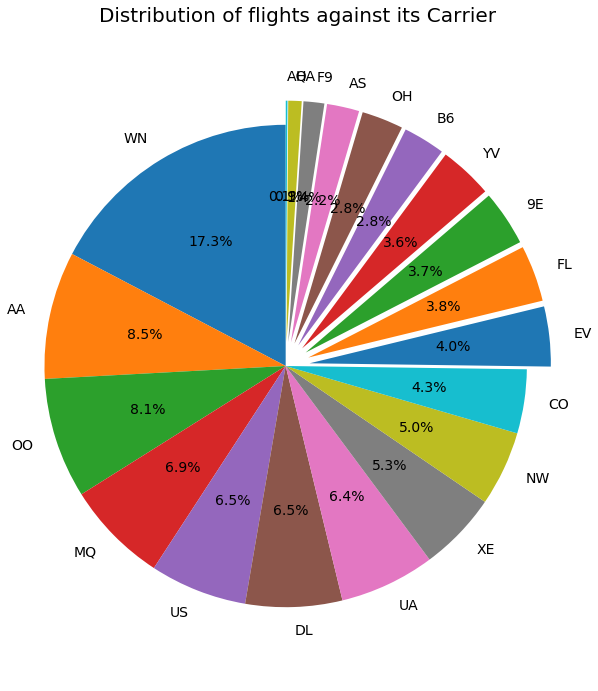

In [13]:
inp=pd.DataFrame(data_dropnull_all.UniqueCarrier.value_counts()) ## flights for each carriers
tmp=inp.UniqueCarrier.sum()
## plot
labels=inp.index
sizes=inp.UniqueCarrier/tmp*100
explode = np.repeat(0.0, 10).tolist()+np.repeat(0.1,10).tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90,textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.title('Distribution of flights against its Carrier',fontsize=20)
plt.show()

The first pie chart provides the percentage of flights over the carriers. It can be easily seen that the ***WN*** Carrier contributed the most and played as dominant Carrier.

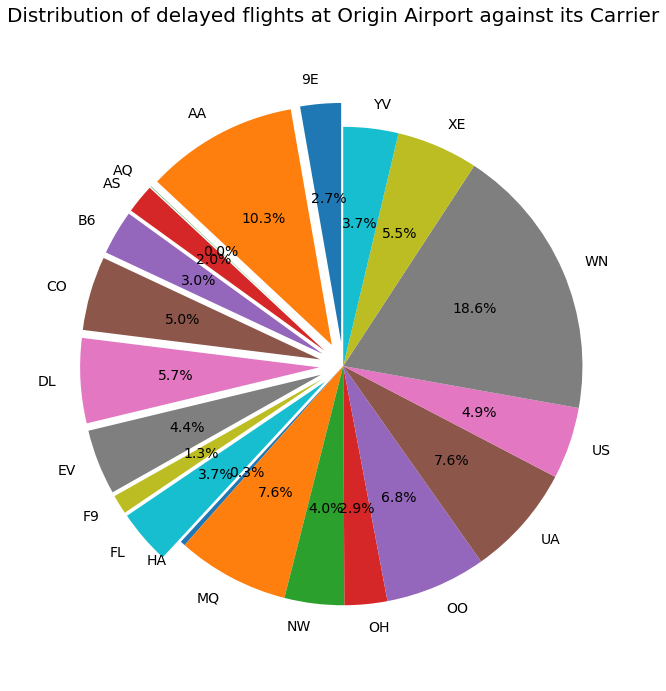

                DepDelay
UniqueCarrier           
9E             56.159600
AA             54.478447
AQ             35.885655
AS             46.834245
B6             63.990449
CO             53.650994
DL             48.178620
EV             56.655340
F9             35.822968
FL             51.681603
HA             44.670896
MQ             51.231072
NW             50.431300
OH             56.289728
OO             54.280459
UA             58.971328
US             48.524203
WN             43.133489
XE             59.258718
YV             63.424858


In [14]:
flight_dep_delay=(data_dropnull_all.DepDelay[data_dropnull_all.DepDelay>10].groupby(data_dropnull_all.UniqueCarrier))
mean_dep_delay=pd.DataFrame(flight_dep_delay.mean())
flight_dep_delay=pd.DataFrame(flight_dep_delay.count())
tmp=flight_dep_delay.DepDelay.sum()
## plot
labels=flight_dep_delay.index
sizes=flight_dep_delay.DepDelay/tmp*100
explode = np.repeat(0.1, 10).tolist()+np.repeat(0.0,10).tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90,textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.title('Distribution of delayed flights at Origin Airport against its Carrier',fontsize=20)
plt.show()
print(mean_dep_delay)

While ***WN*** contributes the most delayed flight at the departure stage, it means delayed time is rank 4 for the least delayed flights shown in above Figure. This time, ***YV*** is the worst Carrier when it comes to the mean time delayed at origin airport.

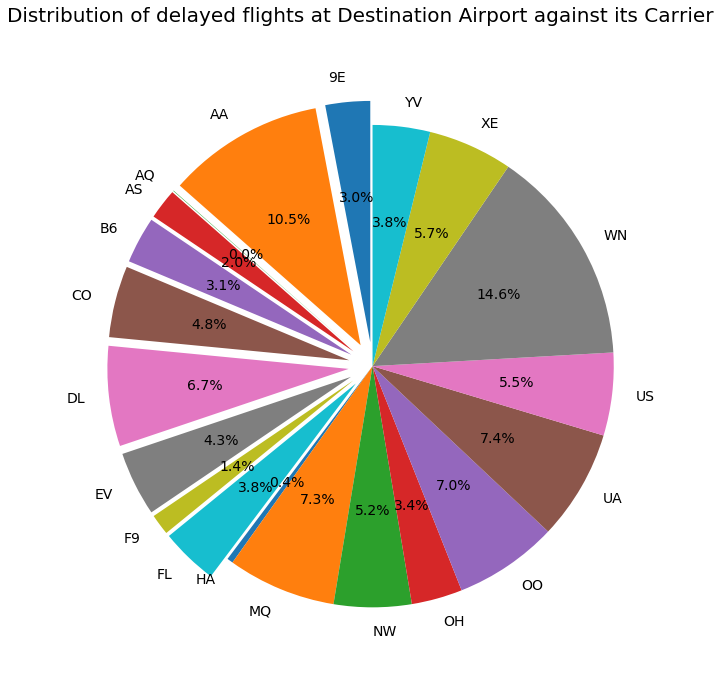

                ArrDelay
UniqueCarrier           
9E             50.586358
AA             52.298679
AQ             31.623009
AS             43.329848
B6             60.910981
CO             52.591870
DL             44.670280
EV             53.700139
F9             35.108944
FL             49.401452
HA             40.408741
MQ             52.576444
NW             44.352516
OH             50.686760
OO             51.312825
UA             55.818439
US             43.791472
WN             44.366979
XE             55.726259
YV             57.021350


In [15]:
flight_arr_delay=(data_dropnull_all.ArrDelay[data_dropnull_all.ArrDelay>10].groupby(data_dropnull_all.UniqueCarrier))
mean_arr_delay=pd.DataFrame(flight_arr_delay.mean())
flight_arr_delay=pd.DataFrame(flight_arr_delay.count())
tmp=flight_arr_delay.ArrDelay.sum()
## plot
labels=flight_arr_delay.index
sizes=flight_arr_delay.ArrDelay/tmp*100
explode = np.repeat(0.1, 10).tolist()+np.repeat(0.0,10).tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90,textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig = plt.gcf()
fig.set_size_inches(10, 12)
plt.title('Distribution of delayed flights at Destination Airport against its Carrier',fontsize=20)
plt.show()
print(mean_arr_delay)

Despite of its least contrition to the number of delayed flights at the arrival airport, AQ Carriers gives fairly delayed time ~13 min. 

Let's take a look a the delayed level at the arrival stage to have a brief concept of how deday of the flights.

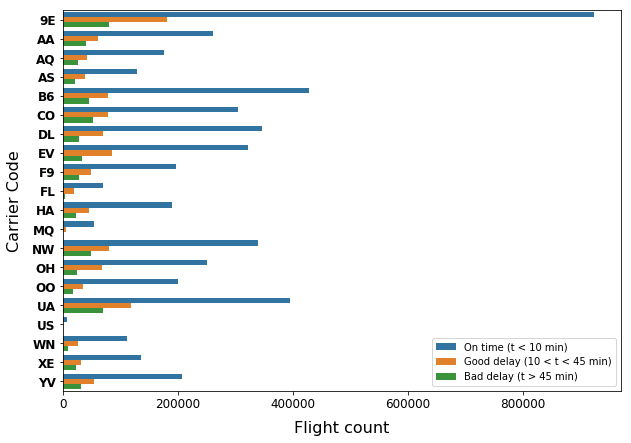

In [16]:
delay_type = lambda x:((0,1)[x > 10],2)[x > 45]
data_dropnull_all['DepLev'] = data_dropnull_all.ArrDelay.apply(delay_type)

#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='UniqueCarrier', hue='DepLev', data=data_dropnull_all)
#____________________________________________________________________________________
# We replace the abbreviations by the full names of the companies and set the labels
labels = mean_dep_delay.index
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
plt.xlabel('Flight count', fontsize=16, weight = 'normal', labelpad=10)
plt.ylabel('Carrier Code', fontsize=16, weight = 'normal', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('On time (t < 10 min)')
L.get_texts()[1].set_text('Good delay (10 < t < 45 min)')
L.get_texts()[2].set_text('Bad delay (t > 45 min)')
plt.show()

Let's take a look at other features effect to the delay on arrival.

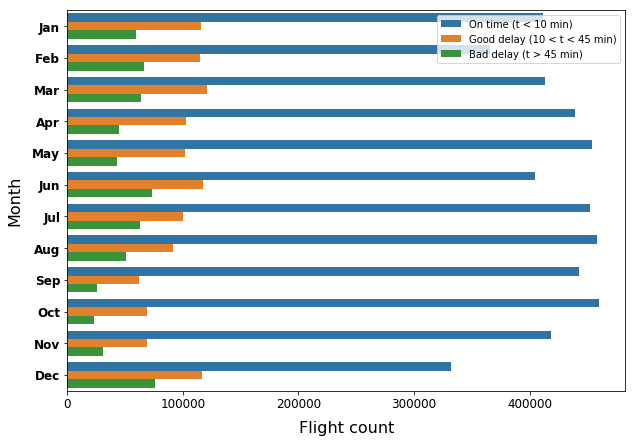

In [17]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='Month', hue='DepLev', data=data_dropnull_all)
labels=['Jan', 'Feb', 'Mar', 'Apr', 'May',
            'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
plt.xlabel('Flight count', fontsize=16, weight = 'normal', labelpad=10)
plt.ylabel('Month', fontsize=16, weight = 'normal', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('On time (t < 10 min)')
L.get_texts()[1].set_text('Good delay (10 < t < 45 min)')
L.get_texts()[2].set_text('Bad delay (t > 45 min)')
plt.show()

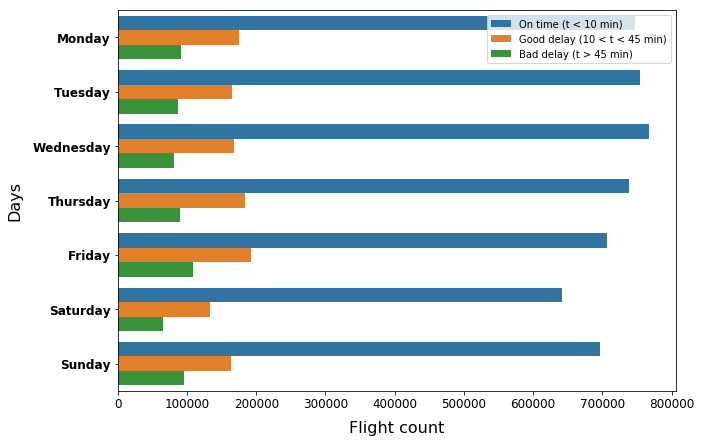

In [18]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='DayOfWeek', hue='DepLev', data=data_dropnull_all)
labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 
                                           'Saturday', 'Sunday']
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
plt.xlabel('Flight count', fontsize=16, weight = 'normal', labelpad=10)
plt.ylabel('Days', fontsize=16, weight = 'normal', labelpad=10)
#________________
# Set the legend
L = plt.legend()
L.get_texts()[0].set_text('On time (t < 10 min)')
L.get_texts()[1].set_text('Good delay (10 < t < 45 min)')
L.get_texts()[2].set_text('Bad delay (t > 45 min)')
plt.show()

With the aim to predict the delay flight at the arrival stage, let's take do a feature selection based on the heapmap of correlation each features. In the end, we can see how a feature can impact to the **ArrDelay** either positively or negatively.

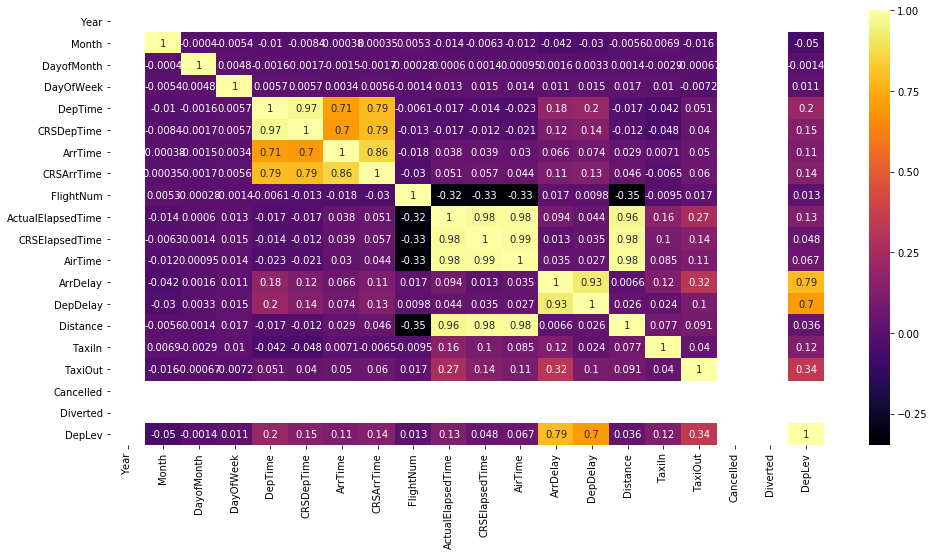

In [19]:
delay_corr=data_dropnull_all.corr()
# Draw the figure
fig, axis = plt.subplots(figsize=(16, 8))

# Draw the heatmap
sns.heatmap(delay_corr,annot=True,cmap='inferno')
plt.show()

As shown in the correlation map, the **Cancelled** and **Diverted** has no impact. We can easily remove them from the data set to predict.

In [20]:
data_dropnull_all=data_dropnull_all.drop(['Cancelled','Diverted'],axis=1)
data_dropnull_all.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'convert_DepTime', 'convert_CRSDepTime', 'convert_ArrTime',
       'convert_CRSArrTime', 'DepLev'],
      dtype='object')

It shows that maximum of the Arrival Delays are due to the Departure Delays (0.93) but some flights has still arrived on time even after departed late from the Origin Airport (0.07).



## 3. Prediction models contruction and Comparision

In [21]:
## removes unneccessary columns before predicting
def print_len(col,data):
    a=len(data[col].unique())
    print(col,a)
    return 
for col in data_dropnull_all.columns:
    print_len(col,data_dropnull_all)

#data_dropnull_all=data_dropnull_all.drop(['FlightNum', 'TailNum'],axis=1)

Year 1
Month 12
DayofMonth 31
DayOfWeek 7
DepTime 1440
CRSDepTime 1202
ArrTime 1440
CRSArrTime 1373
UniqueCarrier 20
FlightNum 7532
TailNum 5366
ActualElapsedTime 689
CRSElapsedTime 507
AirTime 663
ArrDelay 1153
DepDelay 1129
Origin 303
Dest 302
Distance 1414
TaxiIn 190
TaxiOut 341
convert_DepTime 1440
convert_CRSDepTime 1202
convert_ArrTime 1440
convert_CRSArrTime 1373
DepLev 3


In [22]:
data_predict=data_dropnull_all.drop(['FlightNum', 'TailNum'
                                     ,'DepTime',  'CRSDepTime'
                                     ,'ArrTime',  'CRSArrTime'],axis=1)

In [23]:
## Flight num and Tail num are not usefull and has more than 1000 labels
## convert delayed and not delayed (5 min is the threshold)
data_predict.ArrDelay=pd.Series(np.where(data_predict.ArrDelay.values >=5, 1, 0),
          data_predict.index)
data_predict.DepDelay=pd.Series(np.where(data_predict.DepDelay.values >=5, 1, 0),
          data_predict.index)
data_predict.head()

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,convert_DepTime,convert_CRSDepTime,convert_ArrTime,convert_CRSArrTime,DepLev
0,2008,1,3,4,WN,128.0,150.0,116.0,0,1,IAD,TPA,810,4.0,8.0,20:03:00,19:55:00,22:11:00,22:25:00,0
1,2008,1,3,4,WN,128.0,145.0,113.0,0,1,IAD,TPA,810,5.0,10.0,07:54:00,07:35:00,10:02:00,10:00:00,0
2,2008,1,3,4,WN,96.0,90.0,76.0,1,1,IND,BWI,515,3.0,17.0,06:28:00,06:20:00,08:04:00,07:50:00,1
3,2008,1,3,4,WN,88.0,90.0,78.0,0,0,IND,BWI,515,3.0,7.0,09:26:00,09:30:00,10:54:00,11:00:00,0
4,2008,1,3,4,WN,90.0,90.0,77.0,1,1,IND,BWI,515,3.0,10.0,18:29:00,17:55:00,19:59:00,19:25:00,1


In [24]:
## labeling or one hot encoder
le = LabelEncoder()
cols=['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest'] # col to label
for col in cols:
    data_predict[col]=le.fit_transform(data_predict[col])

In [25]:
## drop some more columns
data_predict=data_predict.drop(['convert_DepTime', 'convert_CRSDepTime'
                ,'convert_ArrTime','convert_CRSArrTime','DepLev'],axis=1)
data_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6855024 entries, 0 to 7009727
Data columns (total 15 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
UniqueCarrier        int32
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             int32
DepDelay             int32
Origin               int32
Dest                 int32
Distance             int64
TaxiIn               float64
TaxiOut              float64
dtypes: float64(5), int32(5), int64(5)
memory usage: 1.0 GB


After preparation, the data is ready to build models for prediction. The next section will use the original dimension of the predict data.

### 3.1 Original dimension model prediction

In [26]:
## Determine target
X=data_predict.drop('ArrDelay',axis=1)
y=data_predict.ArrDelay

In [27]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

In [28]:
## use standard scaler 
scale=StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)

In [29]:
#### predicting with different models
BNB=BernoulliNB()
LogR = LogisticRegression()
DTC = tree.DecisionTreeClassifier(max_depth=2)
RFC = RandomForestClassifier(n_estimators=2)
GBC = GradientBoostingClassifier(n_estimators=2) # laterrrrrrrr
model_predict=[BNB,LogR,DTC,RFC,GBC]
## SVM will be updated later
model_name=['Naive Bayes Bernouli Classifier'
           ,'Logistic Regression'
           ,'Decision Tree Classifer'
           ,'Random Forest Classifier'
           ,'Gradient Boosting Classifier']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(X_train_sc,y_train)
    predictions = clf.predict(X_test_sc)
    tmp1=classification_report(y_test,predictions)
    tmp2=accuracy_score(y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    
    
print('======================End of predicting======================')
## 

Naive Bayes Bernouli Classifier
              precision    recall  f1-score   support

           0       0.85      0.89      0.87   1112341
           1       0.78      0.71      0.74    601415

   micro avg       0.83      0.83      0.83   1713756
   macro avg       0.82      0.80      0.81   1713756
weighted avg       0.83      0.83      0.83   1713756

Accuracy Score:        0.829
Computing time:        5.453 second
Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.93      0.92   1112341
           1       0.87      0.84      0.86    601415

   micro avg       0.90      0.90      0.90   1713756
   macro avg       0.89      0.89      0.89   1713756
weighted avg       0.90      0.90      0.90   1713756

Accuracy Score:        0.901
Computing time:       41.740 second
Decision Tree Classifer
              precision    recall  f1-score   support

           0       0.89      0.87      0.88   1112341
           1       0.76      0.

### 3.2 Reduced dimension by PCA model prediction

In [30]:
pca = PCA(n_components=9)
X_PCA=pca.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_PCA,y,test_size=0.25,random_state = 0)
scale=StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)

In [31]:
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(X_train_sc,y_train)
    predictions = clf.predict(X_test_sc)
    tmp1=classification_report(y_test,predictions)
    tmp2=accuracy_score(y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
print('======================End of predicting======================')
## 

Naive Bayes Bernouli Classifier
              precision    recall  f1-score   support

           0       0.72      0.92      0.81   1112341
           1       0.70      0.34      0.45    601415

   micro avg       0.72      0.72      0.72   1713756
   macro avg       0.71      0.63      0.63   1713756
weighted avg       0.71      0.72      0.68   1713756

Accuracy Score:        0.717
Computing time:        4.562 second
Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.93      0.85   1112341
           1       0.79      0.51      0.62    601415

   micro avg       0.78      0.78      0.78   1713756
   macro avg       0.78      0.72      0.73   1713756
weighted avg       0.78      0.78      0.77   1713756

Accuracy Score:        0.781
Computing time:       11.489 second
Decision Tree Classifer
              precision    recall  f1-score   support

           0       0.72      0.94      0.81   1112341
           1       0.73      0.

### 3.3 Rerun model prediction using GridsearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
scale=StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)
BNB=BernoulliNB()
LogR = LogisticRegression()
DTC = tree.DecisionTreeClassifier()
RFC = RandomForestClassifier()
GBC = GradientBoostingClassifier() # laterrrrrrrr
model_predict=[BNB,LogR,DTC,RFC,GBC]
## SVM will be updated later
model_name=['Naive Bayes Bernouli Classifier'
           ,'Logistic Regression'
           ,'Decision Tree Classifer'
           ,'Random Forest Classifier'
           ,'Gradient Boosting Classifier']
# run with the Naive Bayes Bernouli and Logistic Regression only
parameters_logr = [{'C': [1, 10]}]
parameters_dtc = [{'max_depth': [2,4,5,8,10] }]
parameters_RFC = [{'n_estimators': [1,2,3,4,5]}]
parameters_GBC = [{'n_estimators': [1,2,3,4,5]}]
parameters_bnb = [{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'binarize': [0.5]},
              {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'binarize': [0.6]}]
model_parameters=[parameters_bnb,parameters_logr,parameters_dtc,parameters_RFC,parameters_GBC]
para_out=[]
for model, name, para in zip (model_predict,model_name,model_parameters):
    time_start = time.clock()
    grid_search = GridSearchCV(estimator = model,
                           param_grid = para,
                           scoring = 'accuracy',
                           cv = 5)
    grid_search = grid_search.fit(X_train_sc, y_train)
    accuracy = grid_search.best_score_
    param_best=grid_search.best_params_
    print(name)
    para_out.append(param_best)
    print('Best parameter:     ', param_best)
    print('Best Accuracy: %12.3f'%accuracy)
print('======================End of gettting best parameter======================')
## 

Naive Bayes Bernouli Classifier
Best parameter:      {'alpha': 0.1, 'binarize': 0.6}
Best Accuracy:        0.835
Logistic Regression
Best parameter:      {'C': 10}
Best Accuracy:        0.900
Decision Tree Classifer
Best parameter:      {'max_depth': 10}
Best Accuracy:        0.863
Random Forest Classifier
Best parameter:      {'n_estimators': 5}
Best Accuracy:        0.892
Gradient Boosting Classifier
Best parameter:      {'n_estimators': 5}
Best Accuracy:        0.833
======================End of gettting best parameter======================


In [36]:
print('======================Rerun with best parameter using original dimensions======================')
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
scale=StandardScaler()
X_train_sc=scale.fit_transform(X_train)
X_test_sc=scale.transform(X_test)
BNB=BernoulliNB(alpha= 0.1, binarize=0.6)
LogR = LogisticRegression()
DTC = tree.DecisionTreeClassifier(max_depth=10)
RFC = RandomForestClassifier(n_estimators=5)
GBC = GradientBoostingClassifier(n_estimators=5) # laterrrrrrrr
model_predict=[BNB,LogR,DTC,RFC,GBC]
## SVM will be updated later
model_name=['Naive Bayes Bernouli Classifier'
           ,'Logistic Regression'
           ,'Decision Tree Classifer'
           ,'Random Forest Classifier'
           ,'Gradient Boosting Classifier']
## loop
for model, name in zip (model_predict,model_name):
    time_start = time.clock()
    clf=model.fit(X_train_sc,y_train)
    predictions = clf.predict(X_test_sc)
    tmp1=classification_report(y_test,predictions)
    tmp2=accuracy_score(y_test,predictions)
    time_elapsed = (time.clock() - time_start)
    print(name)
    print(tmp1)
    print('Accuracy Score: %12.3f'%tmp2)
    print('Computing time: %12.3f second'%time_elapsed)
    print('==========================================================')
    
    
print('======================End of predicting======================')
## 

======================Rerun with best parameter using original dimensions======================
Naive Bayes Bernouli Classifier
              precision    recall  f1-score   support

           0       0.86      0.89      0.87   1112341
           1       0.78      0.73      0.76    601415

   micro avg       0.83      0.83      0.83   1713756
   macro avg       0.82      0.81      0.82   1713756
weighted avg       0.83      0.83      0.83   1713756

Accuracy Score:        0.835
Computing time:        5.145 second
Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.93      0.92   1112341
           1       0.87      0.84      0.86    601415

   micro avg       0.90      0.90      0.90   1713756
   macro avg       0.89      0.89      0.89   1713756
weighted avg       0.90      0.90      0.90   1713756

Accuracy Score:        0.901
Computing time:       42.212 second
Decision Tree Classifer
              precision    recall  f1-score 

### 3.4 Comparison between models

| Models | precision | recall | f1-score | accuracy | Time elapsed |
|--------|-----------|--------|----------|----------|--------------|
|  BNB   |    0.86   |  0.89  |  0.87    |  0.835   |    5.145     |
|  LoR   |    0.92   |  0.93  |  0.92    |  0.901   |    42.212    |
|  DTC   |    0.90   |  0.89  |  0.89    |  0.864   |    82.545    |
|  RFC   |    0.92   |  0.91  |  0.92    |  0.890   |    155.140   |
|  GBC   |    0.83   |  0.93  |  0.88    |  0.828   |    68.187    |


In general, all of models predict very well the out come of delay flight issue. This can be achieve because of the data was collected clearly and there is not much noise in the data sets. Further more, the significant dependenence of the delay arrival on the delay at departure also contribute to this result.
As shown in the above Table, the **Logistic Regression** yields the best performance among the others in the aspect of precision and accuracy. In terms of computational time, the **Naive Bayes Bernouli** consumes less than 6 second to produce the prediction model. All of the model gives very high fidelity with the presicison larger than 80 % and the accuracy larger than 80%. 

***Analysis***

First, let compare **Naïve Bayes** and **Logistic regression** [1]

**Naïve Bayes**: For the given features (x) and the label y, it estimates a joint probability from the training data. Hence this is a Generative model.
Its model assumes all the features are conditionally independent .so, if some of the features are dependent on each other (in case of a large feature space), the prediction might be poor.
**Logistic regression**: Estimates the probability(y/x) directly from the training data by minimizing error. Hence this is a Discriminative model. It the splits feature space linearly, it works OK even if some of the variables are correlated. 

In ourdata, some feautures depend on the others such as **DepTime**, **CRSDepTime**, ect. (shown in the correlation figure). Thus, **Naïve Bayes** works poorer than the **Logistic regression**. Furthermore, a paper by Professor Andrew Ng and Professor Michael I Jordan [2] provides a mathematical proof of error properties of both models. They conclude that when the training size reaches infinity the discriminative model: logistic regression performs better than the generative model Naive Bayes.

Then we take a look at **DecisionTreeClassifier** and **RandomForestClassifier**.

*Advantages of Decision Tree*:
- Easy to interpret.
- Handles both continuous and categorical targets attributes.
- Performs well on large data sets
- Requires minimum data cleaning

*Disadvantages of Decision Tree*:
- Prone to over-fitting

*Advantages of Random Forest algorithm*:
- High predictive accuracy.
- Efficient on large data sets
- Ability to handle multiple input features without need for feature deletion
- Feature selection is possible

*Disadvantages of Random Forest algorithm*:
- Interpretation is complex.


## 4. Conclusion

In this report, models are contructed to predict flight delays using Naïve Bayes, Logistic Regression, Decision Tree, Random Forest, Gradient Boosting and SVM. There are two sections for the model prediction, one using all possible features and one use PCA for features selection.
We can see that Delay of arrival flight strongly depends on the departure delay, which is cause due to system, security or weather delay. The first section of this report has conveyed the visualization and the data insights. While the second part offered the predicting models based on different algorithms.

In general, all of models predict very well the out come of delay flight issue. This can be achieve because of the data was collected clearly and there is not much noise in the data sets. Further more, the significant dependenence of the delay arrival on the delay at departure also contribute to this result. As shown in the above Table, the Logistic Regression yields the best performance among the others in the aspect of precision and accuracy. In terms of computational time, the Naive Bayes Bernouli consumes less than 6 second to produce the prediction model. Excluding the Naive Bayes Bernouli, all of the model gives very high fidelity with the presicison larger than 90 % and the accuracy larger than 87%. 

In the case of regession of a yes/no variable, the PCA gives quite bad results although reduces the computing time in some manners. 

### **Reference**


1. [https://dataespresso.com/en/2017/10/24/comparison-between-naive-bayes-and-logistic-regression/]

2. [ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf]

[https://www.kaggle.com/fabiendaniel/predicting-flight-delays-tutorial]
[https://github.com/krishnaik06/GRIDSearchCV/blob/master/Gridsearchcv.ipyn]
[https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html]
[https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html]
[https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html]
[https://medium.com/@aravanshad/gradient-boosting-versus-random-forest-cfa3fa8f0d80]
